# Silicon Wafer Fault Detection ML Code

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [3]:
df = pd.read_csv("uci-secom.csv",index_col=0)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
Time,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [5]:
df.shape

(1567, 591)

# Cleaning Dataset

In [6]:
df.isnull().any().any()

True

In [7]:
df = df.replace('?', np.nan)
df = df.apply(lambda x: x.fillna(0),axis=0)
df.isnull().any().any()

False

# Selecting unique features

In [8]:
for i in range(len(df.columns) - 2, -1, -1):
    unique_vals = df.iloc[:,i].unique()
    print(len(unique_vals))
    if len(unique_vals)==1:
        df.drop(df.columns[i],axis=1, inplace=True)

611
121
261
323
1503
69
228
172
611
121
261
323
851
820
599
830
754
518
811
814
898
888
620
888
754
582
786
874
415
346
400
366
1063
1071
1086
1001
1078
974
214
748
1049
965
1024
1048
274
22
72
103
337
337
334
1
1
1
1
1
1
1
1
1
1
1
1549
1514
1527
1543
1040
1562
9
1536
836
543
544
499
1
1
1
1
586
1498
1
1
1
1
1
1
1
1
1
648
703
1
1510
1511
964
894
572
227
473
1563
1344
1314
1199
1039
1358
1324
1402
1062
1
1561
1508
2
1538
1559
1527
1559
1558
1561
1553
1548
1515
1317
418
1
1
1
1
1
1
1565
1519
1
1548
1552
1528
1556
1551
1519
1
1
1
327
318
339
330
326
331
336
326
1558
1551
967
1496
1539
1524
1537
1371
1503
1553
1551
1542
405
1539
1482
1541
1530
1564
1
1535
1515
851
1051
1552
510
514
1
519
518
510
1546
1549
594
332
336
229
1
1
1
1
1
1
1
1
1
1
1
953
109
184
1458
92
1564
22
191
232
537
526
30
1
1
1
1
32
37
1
1
1
1
1
1
1
97
113
108
121
1
1517
390
972
97
215
21
29
1474
573
487
564
355
500
436
374
358
2
763
768
1552
1542
2
1518
762
1544
1520
1517
1533
1527
1146
1528
1518
314
1
1
1
1
1


1
1561
1537
1
1512
551
1551
1536
1161
1534
1
1
1
308
277
311
291
294
287
263
315
1106
510
570
1135
967
626
725
1559
1565
1561
1562
139
93
354
325
1523
88
1077
1541
1528
1
1516
115
228
247
542
22
513
1
459
518
519
1558
1560
600
331
334
292
1
1
1
1
1
1
1
1
1
1
1
1317
291
443
1533
143
1566
23
426
490
548
540
67
1
1
1
1
81
94
1
1
1
1
1
1
1
1
1
293
330
1
1473
721
973
178
408
70
65
1540
837
729
824
804
811
682
654
799
2
1550
1047
2
842
1211
1502
1470
861
1009
921
774
899
868
207
1
1
1
1
1
1
1551
1016
1
740
1055
1509
906
688
891
1
1
251
320
328
309
320
308
307
332
653
208
32
63
404
219
260
1325
1411
744
954
139
129
722
66
1552
220
1395
1499
1444
1
1552
295
580
657
962
63
375
1
499
518
349
1060
1090
135
336
337
307
69
311
93
268
325
274
156
60
51
310
55
1269
249
329
1527
136
1567
20
468
249
546
547
97
1183
1159
180
177
55
154
1066
29
35
272
1420
1
1333
14
22
174
180
1191
1514
651
973
249
472
98
181
1507
888
580
922
691
996
842
892
675
2
771
774
1558
1534
2
1480
1307
1560
1551
1497
1535
1519
14

In [9]:
# Rename the remaining features uniformly (excluding the last column)
df.columns = [str(i) for i in range(1, df.shape[1])] + [df.columns[-1]]
print(df.shape)

(1567, 479)


# Handling Outliers

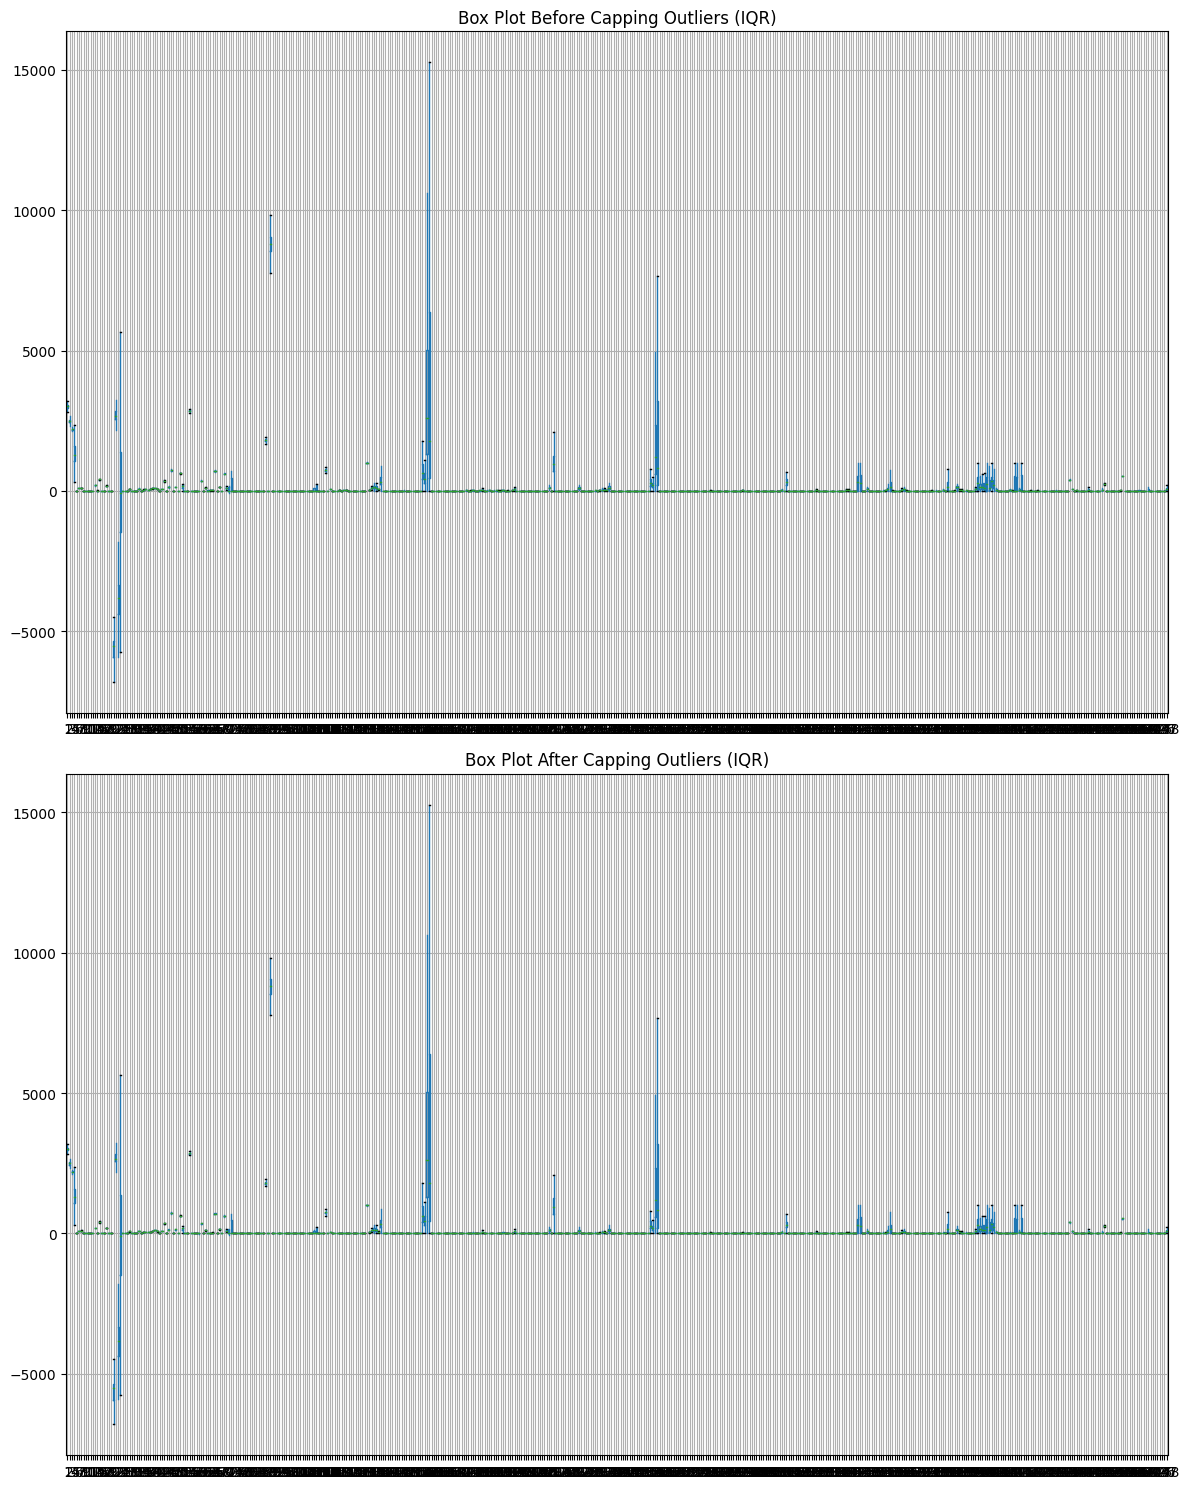

In [12]:
def cap_outliers_iqr(dataframe, features, cap_value=1.5):
    for feature in features:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - cap_value * IQR
        upper_bound = Q3 + cap_value * IQR
        dataframe[feature] = np.clip(dataframe[feature], lower_bound, upper_bound)
    return dataframe

all_features_to_process = [str(i) for i in range(1, 479)]  # Update the range

df_capped = cap_outliers_iqr(df.copy(), all_features_to_process)

plt.figure(figsize=(12, 15))

# Box plot before capping outliers
plt.subplot(2, 1, 1)
df[all_features_to_process].boxplot()
plt.title('Box Plot Before Capping Outliers (IQR)')

# Box plot after capping outliers
plt.subplot(2, 1, 2)
df_capped[all_features_to_process].boxplot()
plt.title('Box Plot After Capping Outliers (IQR)')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

# updating df
df = df_capped


# Scaling

In [ ]:
X = df.drop('Pass/Fail', axis=1)
X = X.to_numpy()
y = df[['Pass/Fail']]
y = y.squeeze()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Removing highly Correlated features

In [ ]:

def remove_collinear_features(x, threshold):
    # Convert NumPy array to Pandas DataFrame
    x_df = pd.DataFrame(x, columns=[str(i) for i in range(1, x.shape[1] + 1)])

    corr_matrix = x_df.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i + 1):
            item = corr_matrix.iloc[j:(j + 1), (i + 1):(i + 2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
                drops = set(drop_cols)
    x_df = x_df.drop(columns=drops)

    # Convert DataFrame back to NumPy array
    x_filtered = x_df.to_numpy()

    return x_filtered

# Assuming X is your NumPy array
X_filtered = remove_collinear_features(X, 0.9)

18 | 13 | 0.97
26 | 25 | 0.9
27 | 25 | 0.97
27 | 26 | 0.95
36 | 34 | 0.99
50 | 46 | 0.9
64 | 63 | 0.94
69 | 65 | 0.94
72 | 71 | 0.98
95 | 93 | 0.95
99 | 96 | 0.95
102 | 97 | 0.98
103 | 91 | 0.98
104 | 92 | 0.99
108 | 107 | 1.0
109 | 107 | 1.0
109 | 108 | 1.0
121 | 119 | 0.95
122 | 119 | 0.9
122 | 121 | 0.91
125 | 120 | 0.96
150 | 145 | 0.98
170 | 168 | 1.0
188 | 183 | 0.97
219 | 107 | 0.92
219 | 108 | 0.92
219 | 109 | 0.92
232 | 133 | 0.92
233 | 134 | 0.97
234 | 135 | 0.98
235 | 136 | 0.9
236 | 137 | 0.98
237 | 138 | 0.99
238 | 139 | 0.96
239 | 140 | 0.94
240 | 141 | 0.97
241 | 142 | 0.94
242 | 143 | 0.94
243 | 144 | 1.0
244 | 145 | 0.97
244 | 150 | 0.95
245 | 146 | 0.97
246 | 147 | 0.97
247 | 148 | 0.99
248 | 149 | 1.0
249 | 145 | 0.95
249 | 150 | 0.97
249 | 244 | 0.98
250 | 151 | 0.92
251 | 152 | 0.97
254 | 155 | 1.0
255 | 156 | 0.99
256 | 157 | 1.0
257 | 158 | 0.99
258 | 159 | 0.99
259 | 160 | 0.99
260 | 161 | 0.99
261 | 162 | 0.95
262 | 163 | 0.95
263 | 164 | 0.96
264 | 165 | 0.98


In [ ]:
print("Original shape:", X.shape)
print("Shape after removing highly correlated features:", X_filtered.shape)
X=X_filtered

Original shape: (1567, 478)
Shape after removing highly correlated features: (1567, 276)


# Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X = pca.fit_transform(X)

In [ ]:
X.shape

(1567, 100)

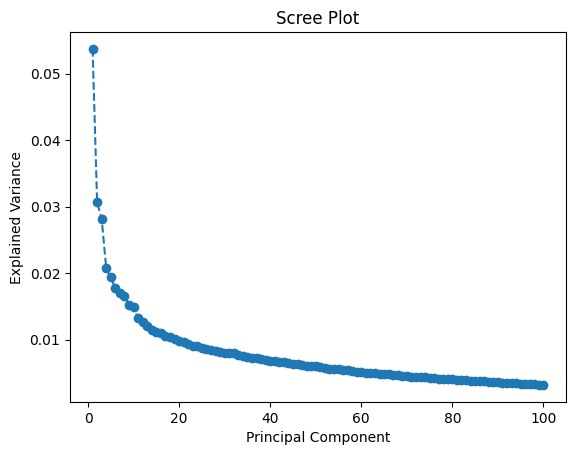

In [ ]:
explained_variance = pca.explained_variance_ratio_
#print(explained_variance)
cumulative_explained_variance = explained_variance.cumsum()
#print(cumulative_explained_variance)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

# Remove Dataset for Inferencing

In [ ]:
# Assuming you want to remove 10 rows from both classes
num_rows_to_remove_per_class = 10

# Check the shapes and counts before removal
print("Original X size", X.shape)
print("Original y size", y.shape)
defected_count = y[y == -1].shape[0]
not_defected_count = y[y == 1].shape[0]
print("Defected count in original data:", defected_count)
print("Not defected count in original data:", not_defected_count)

# Identify the indices of rows to be removed for each class
true_indices_remove = y[y == 1].sample(num_rows_to_remove_per_class, random_state=42).index
false_indices_remove = y[y == -1].sample(num_rows_to_remove_per_class, random_state=42).index

# Create a DataFrame to store the removed rows
X_df=pd.DataFrame(X,index=y.index)
removed_data = X_df.loc[pd.Index(true_indices_remove).union(false_indices_remove)].copy()
removed_data=removed_data.join(y[true_indices_remove.union(false_indices_remove)])

# Drop the selected rows from X and y
X = X[~df.index.isin(true_indices_remove.union(false_indices_remove))]
y = y[~df.index.isin(true_indices_remove.union(false_indices_remove))]

# Check the new shapes and counts
print("new X size", X.shape)
print("new y size", y.shape)
print("Removed data shape:", removed_data.shape)

defected_count = y[y == -1].shape[0]
not_defected_count = y[y == 1].shape[0]
print("Defected count in new data:", defected_count)
print("Not defected count in new data:", not_defected_count)


Original X size (1567, 100)
Original y size (1567,)
Defected count in original data: 1463
Not defected count in original data: 104
new X size (1546, 100)
new y size (1546,)
Removed data shape: (23, 101)
Defected count in new data: 1452
Not defected count in new data: 94


In [ ]:
y[y == -1] = 0

In [ ]:
print(removed_data['Pass/Fail'])

Time
2008-01-09 19:54:00    1
2008-03-10 03:56:00   -1
2008-05-10 15:35:00    1
2008-05-10 16:49:00    1
2008-07-19 13:17:00    1
2008-07-29 18:08:00    1
2008-08-15 09:38:00   -1
2008-08-16 15:19:00    1
2008-08-20 01:42:00   -1
2008-08-20 03:12:00    1
2008-08-20 09:17:00    1
2008-08-22 01:04:00    1
2008-08-31 10:59:00    1
2008-08-31 10:59:00   -1
2008-08-31 10:59:00    1
2008-08-31 10:59:00   -1
2008-08-31 21:46:00   -1
2008-09-20 10:51:00   -1
2008-09-20 14:00:00   -1
2008-09-21 01:06:00   -1
2008-09-21 16:43:00   -1
2008-09-24 17:54:00   -1
2008-12-09 11:57:00   -1
Name: Pass/Fail, dtype: int64


In [ ]:
removed_data['Pass/Fail'].replace(-1, 0, inplace=True)
print(removed_data['Pass/Fail'])

Time
2008-01-09 19:54:00    1
2008-03-10 03:56:00    0
2008-05-10 15:35:00    1
2008-05-10 16:49:00    1
2008-07-19 13:17:00    1
2008-07-29 18:08:00    1
2008-08-15 09:38:00    0
2008-08-16 15:19:00    1
2008-08-20 01:42:00    0
2008-08-20 03:12:00    1
2008-08-20 09:17:00    1
2008-08-22 01:04:00    1
2008-08-31 10:59:00    1
2008-08-31 10:59:00    0
2008-08-31 10:59:00    1
2008-08-31 10:59:00    0
2008-08-31 21:46:00    0
2008-09-20 10:51:00    0
2008-09-20 14:00:00    0
2008-09-21 01:06:00    0
2008-09-21 16:43:00    0
2008-09-24 17:54:00    0
2008-12-09 11:57:00    0
Name: Pass/Fail, dtype: int64


# Balancing

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()

In [ ]:
defected_count = y.to_list().count(0)
not_defected_count =y.to_list().count(1)
print("Data set::")
print("Defected count:", defected_count)
print("Not defected count:", not_defected_count)

Data set::
Defected count: 1452
Not defected count: 94


In [ ]:
# Apply SMOTE to the dataset
X, y = smt.fit_resample(X, y)
# Print the balanced class distribution
print("Class distribution after applying SMOTE to dataset:")
print(y.value_counts())

Class distribution after applying SMOTE to dataset:
0    1452
1    1452
Name: Pass/Fail, dtype: int64


In [ ]:
defected_count = y.to_list().count(0)
not_defected_count =y.to_list().count(1)
print("Data set::")
print("Defected count:", defected_count)
print("Not defected count:", not_defected_count)

Data set::
Defected count: 1452
Not defected count: 1452


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# K-means clustering

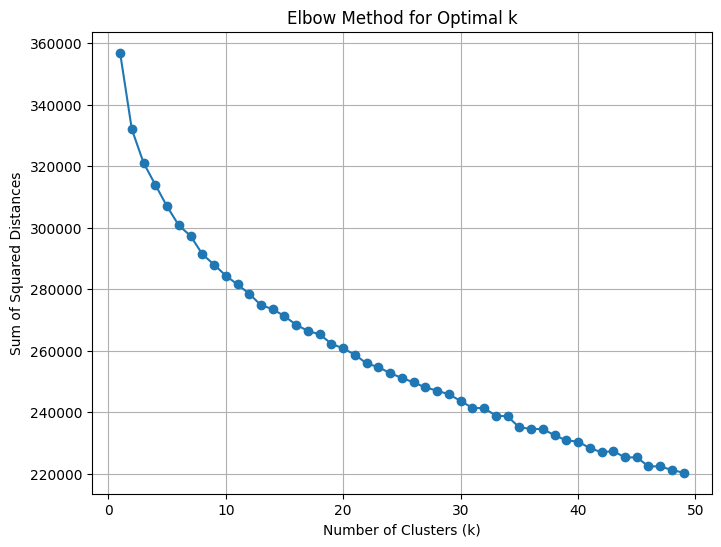

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of k values to test
k_values = range(1, 50)  # You can adjust this range

# Sum of squared distances for each k
ssd = []

# Fit K-Means for each k and compute sum of squared distances
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train)
    ssd.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

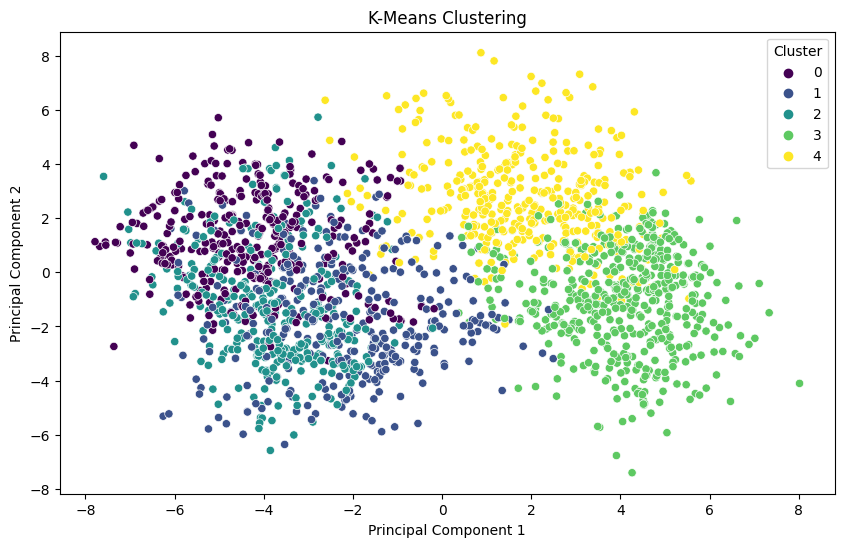

In [ ]:
# Import the K-Means clustering algorithm
from sklearn.cluster import KMeans

# Create a K-Means model with a specified number of clusters
n_clusters = 5 # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the K-Means model to your data
kmeans.fit(X_train)  # Use the training data for clustering

# Get the cluster assignments for each data point
train_cluster_labels = kmeans.predict(X_train)

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=train_cluster_labels, palette='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()


# KNN

# Find Optimal value of K

Text(0, 0.5, 'Error Rate')

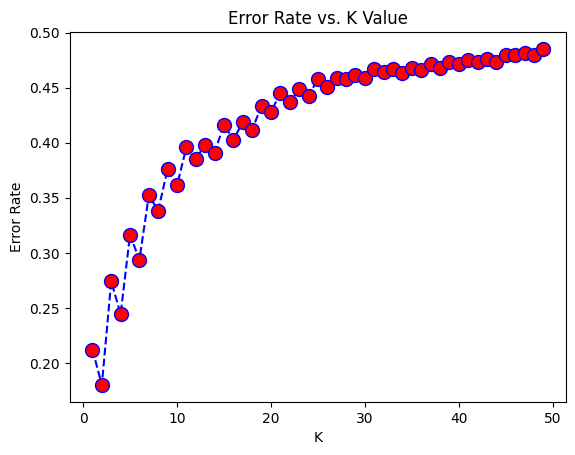

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
min_value = min(error_rate)  # Find the smallest value in the list
min_k = error_rate.index(min_value) 
print(min_value)
print(min_k)

0.18004587155963303
1


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=min_k)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

train_accuracy_k = knn.score(X_train, y_train)
test_accuracy_k = knn.score(X_test, y_test)
print("Train Accuracy: ",train_accuracy_k)
print("Test Accuracy: ",test_accuracy_k)

accuracy_k = accuracy_score(y_test, pred)
print("Accuracy: ",accuracy_k)

Train Accuracy:  1.0
Test Accuracy:  0.7878440366972477
Accuracy:  0.7878440366972477


In [ ]:
print("Confusion matrix :")
print(confusion_matrix(y_test,pred))

print("Classification Report:")
report_k=classification_report(y_test,pred)
print(report_k)
lines = report_k.split('\n')

Confusion matrix :
[[255 185]
 [  0 432]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.73       440
           1       0.70      1.00      0.82       432

    accuracy                           0.79       872
   macro avg       0.85      0.79      0.78       872
weighted avg       0.85      0.79      0.78       872



In [ ]:
from sklearn.metrics import roc_auc_score
f1_score_line = lines[2]
f1_score_k= float(f1_score_line.split()[3])
print("F1 Score:", f1_score_k)

f1_score_line = lines[2]
precision_k= float(f1_score_line.split()[1])
print("Precision:", precision_k)

f1_score_line = lines[2]
recall_k= float(f1_score_line.split()[2])
print("Recall:", recall_k)

auc_roc = roc_auc_score(y_test, pred)
print("AUC-ROC:", auc_roc)

F1 Score: 0.73
Precision: 1.0
Recall: 0.58
AUC-ROC: 0.7897727272727273


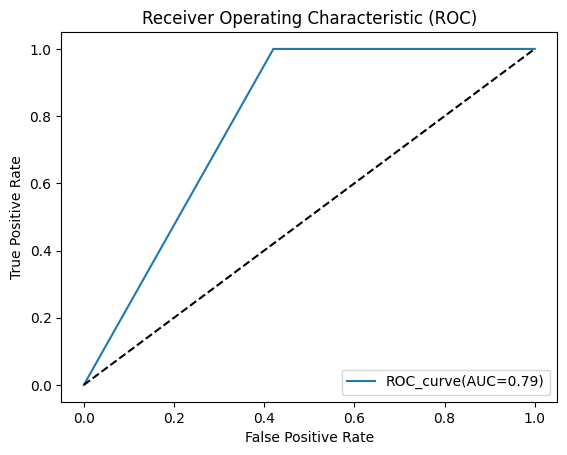

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,label='ROC_curve(AUC={:.2f})'.format(auc_roc))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
pred = classifier.predict(X_test)

train_accuracy_l1 = classifier.score(X_train, y_train)
test_accuracy_l1 = classifier.score(X_test, y_test)
print("Train Accuracy: ",train_accuracy_l1)
print("Test Accuracy: ",test_accuracy_l1)

accuracy_l1 = accuracy_score(y_test, pred)
print("Accuracy: ",accuracy_l1)

Train Accuracy:  0.8730314960629921
Test Accuracy:  0.823394495412844
Accuracy:  0.823394495412844


In [ ]:
print("Confusion matrix :")
print(confusion_matrix(y_test,pred))

print("Classification Report:")
report_l1=classification_report(y_test,pred)
print(report_l1)
lines = report_l1.split('\n')


Confusion matrix :
[[331 109]
 [ 45 387]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       440
           1       0.78      0.90      0.83       432

    accuracy                           0.82       872
   macro avg       0.83      0.82      0.82       872
weighted avg       0.83      0.82      0.82       872



In [ ]:
f1_score_line = lines[2]
f1_score_l1= float(f1_score_line.split()[3])
print("F1 Score:", f1_score_l1)

f1_score_line = lines[2]
precision_l1= float(f1_score_line.split()[1])
print("Precision:", precision_l1)

f1_score_line = lines[2]
recall_l1= float(f1_score_line.split()[2])
print("Recall:", recall_l1)

auc_roc = roc_auc_score(y_test, pred)
print("AUC-ROC:", auc_roc)

F1 Score: 0.81
Precision: 0.88
Recall: 0.75
AUC-ROC: 0.8240530303030303


# Boosting For Logistic Regression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = LogisticRegression(max_iter=500)
boosted_classifier = AdaBoostClassifier(base_estimator=classifier, n_estimators=200)
boosted_classifier.fit(X_train, y_train)

# Make predictions on the test set
pred = boosted_classifier.predict(X_test)


In [ ]:
train_accuracy_l = boosted_classifier.score(X_train, y_train)
test_accuracy_l = boosted_classifier.score(X_test, y_test)
print("Train Accuracy: ",train_accuracy_l)
print("Test Accuracy: ",test_accuracy_l)

accuracy_l = accuracy_score(y_test, pred)
print("Accuracy: ",accuracy_l)

Train Accuracy:  0.8351377952755905
Test Accuracy:  0.7798165137614679
Accuracy:  0.7798165137614679


In [ ]:
print("Confusion matrix :")
print(confusion_matrix(y_test,pred))

print("Classification Report:")
report_l=classification_report(y_test,pred)
print(report_l)
lines = report_l.split('\n')

Confusion matrix :
[[337 103]
 [ 89 343]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       440
           1       0.77      0.79      0.78       432

    accuracy                           0.78       872
   macro avg       0.78      0.78      0.78       872
weighted avg       0.78      0.78      0.78       872



In [ ]:
f1_score_line = lines[2]
f1_score_l= float(f1_score_line.split()[3])
print("F1 Score:", f1_score_l)

f1_score_line = lines[2]
precision_l= float(f1_score_line.split()[1])
print("Precision:", precision_l)

f1_score_line = lines[2]
recall_l= float(f1_score_line.split()[2])
print("Recall:", recall_l)

auc_roc = roc_auc_score(y_test, pred)
print("AUC-ROC:", auc_roc)

F1 Score: 0.78
Precision: 0.79
Recall: 0.77
AUC-ROC: 0.7799452861952862


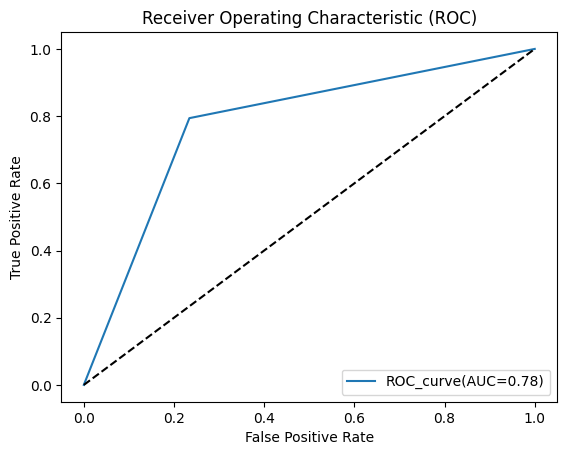

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,label='ROC_curve(AUC={:.2f})'.format(auc_roc))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes_classifier = BernoulliNB()
naive_bayes_classifier.fit(X_train, y_train)

pred = naive_bayes_classifier.predict(X_test)


In [ ]:
train_accuracy_n1 = naive_bayes_classifier.score(X_train, y_train)
test_accuracy_n1 = naive_bayes_classifier.score(X_test, y_test)
print("Train Accuracy: ",train_accuracy_n1)
print("Test Accuracy: ",test_accuracy_n1)

accuracy_n1 = accuracy_score(y_test, pred)
print("Accuracy: ",accuracy_n1)

Train Accuracy:  0.7859251968503937
Test Accuracy:  0.7591743119266054
Accuracy:  0.7591743119266054


In [ ]:
print("Confusion matrix :")
print(confusion_matrix(y_test,pred))

print("Classification Report:")
report_n1=classification_report(y_test,pred)
print(report_n1)
lines = report_n1.split('\n')

Confusion matrix :
[[343  97]
 [113 319]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       440
           1       0.77      0.74      0.75       432

    accuracy                           0.76       872
   macro avg       0.76      0.76      0.76       872
weighted avg       0.76      0.76      0.76       872



In [ ]:
f1_score_line = lines[2]
f1_score_n1= float(f1_score_line.split()[3])
print("F1 Score:", f1_score_n1)

f1_score_line = lines[2]
precision_n1= float(f1_score_line.split()[1])
print("Precision:", precision_n1)

f1_score_line = lines[2]  
recall_n1= float(f1_score_line.split()[2])
print("Recall:", recall_n1)

auc_roc = roc_auc_score(y_test, pred)
print("AUC-ROC:", auc_roc)

F1 Score: 0.77
Precision: 0.75
Recall: 0.78
AUC-ROC: 0.7589856902356903


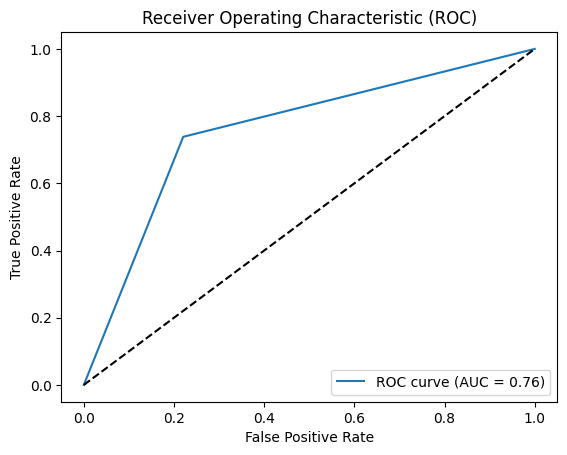

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Boosting for Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

naive_bayes = BernoulliNB()
boosted_naive_bayes = AdaBoostClassifier(base_estimator=naive_bayes, n_estimators=200)

boosted_naive_bayes.fit(X_train, y_train)

pred = boosted_naive_bayes.predict(X_test)


In [ ]:
train_accuracy_n = boosted_naive_bayes.score(X_train, y_train)
test_accuracy_n = boosted_naive_bayes.score(X_test, y_test)
print("Train Accuracy: ",train_accuracy_n)
print("Test Accuracy: ",test_accuracy_n)

accuracy_n = accuracy_score(y_test, pred)
print("Accuracy: ",accuracy_n)

Train Accuracy:  0.8139763779527559
Test Accuracy:  0.7878440366972477
Accuracy:  0.7878440366972477


In [ ]:
print("Confusion matrix :")
print(confusion_matrix(y_test,pred))

print("Classification Report:")
report_n=classification_report(y_test,pred)
print(report_n)
lines = report_n.split('\n')

Confusion matrix :
[[348  92]
 [ 93 339]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       440
           1       0.79      0.78      0.79       432

    accuracy                           0.79       872
   macro avg       0.79      0.79      0.79       872
weighted avg       0.79      0.79      0.79       872



In [ ]:
f1_score_line = lines[2]
f1_score_n= float(f1_score_line.split()[3])
print("F1 Score:", f1_score_n)

f1_score_line = lines[2]
precision_n= float(f1_score_line.split()[1])
print("Precision:", precision_n)

f1_score_line = lines[2]
recall_n= float(f1_score_line.split()[2])
print("Recall:", recall_n)

auc_roc = roc_auc_score(y_test, pred)
print("AUC-ROC:", auc_roc)

F1 Score: 0.79
Precision: 0.79
Recall: 0.79
AUC-ROC: 0.7878156565656566


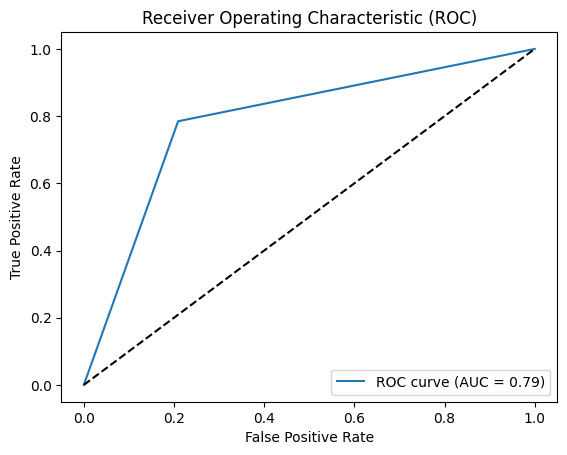

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [ ]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10) 
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred = dtree.predict(X_test)

train_accuracy_d1 = dtree.score(X_train, y_train)
test_accuracy_d1 = dtree.score(X_test, y_test)
print("Train Accuracy: ",train_accuracy_d1)
print("Test Accuracy: ",test_accuracy_d1)

accuracy_d1 = accuracy_score(y_test, pred)
print("Accuracy: ",accuracy_d1)


Train Accuracy:  0.9645669291338582
Test Accuracy:  0.841743119266055
Accuracy:  0.7878440366972477


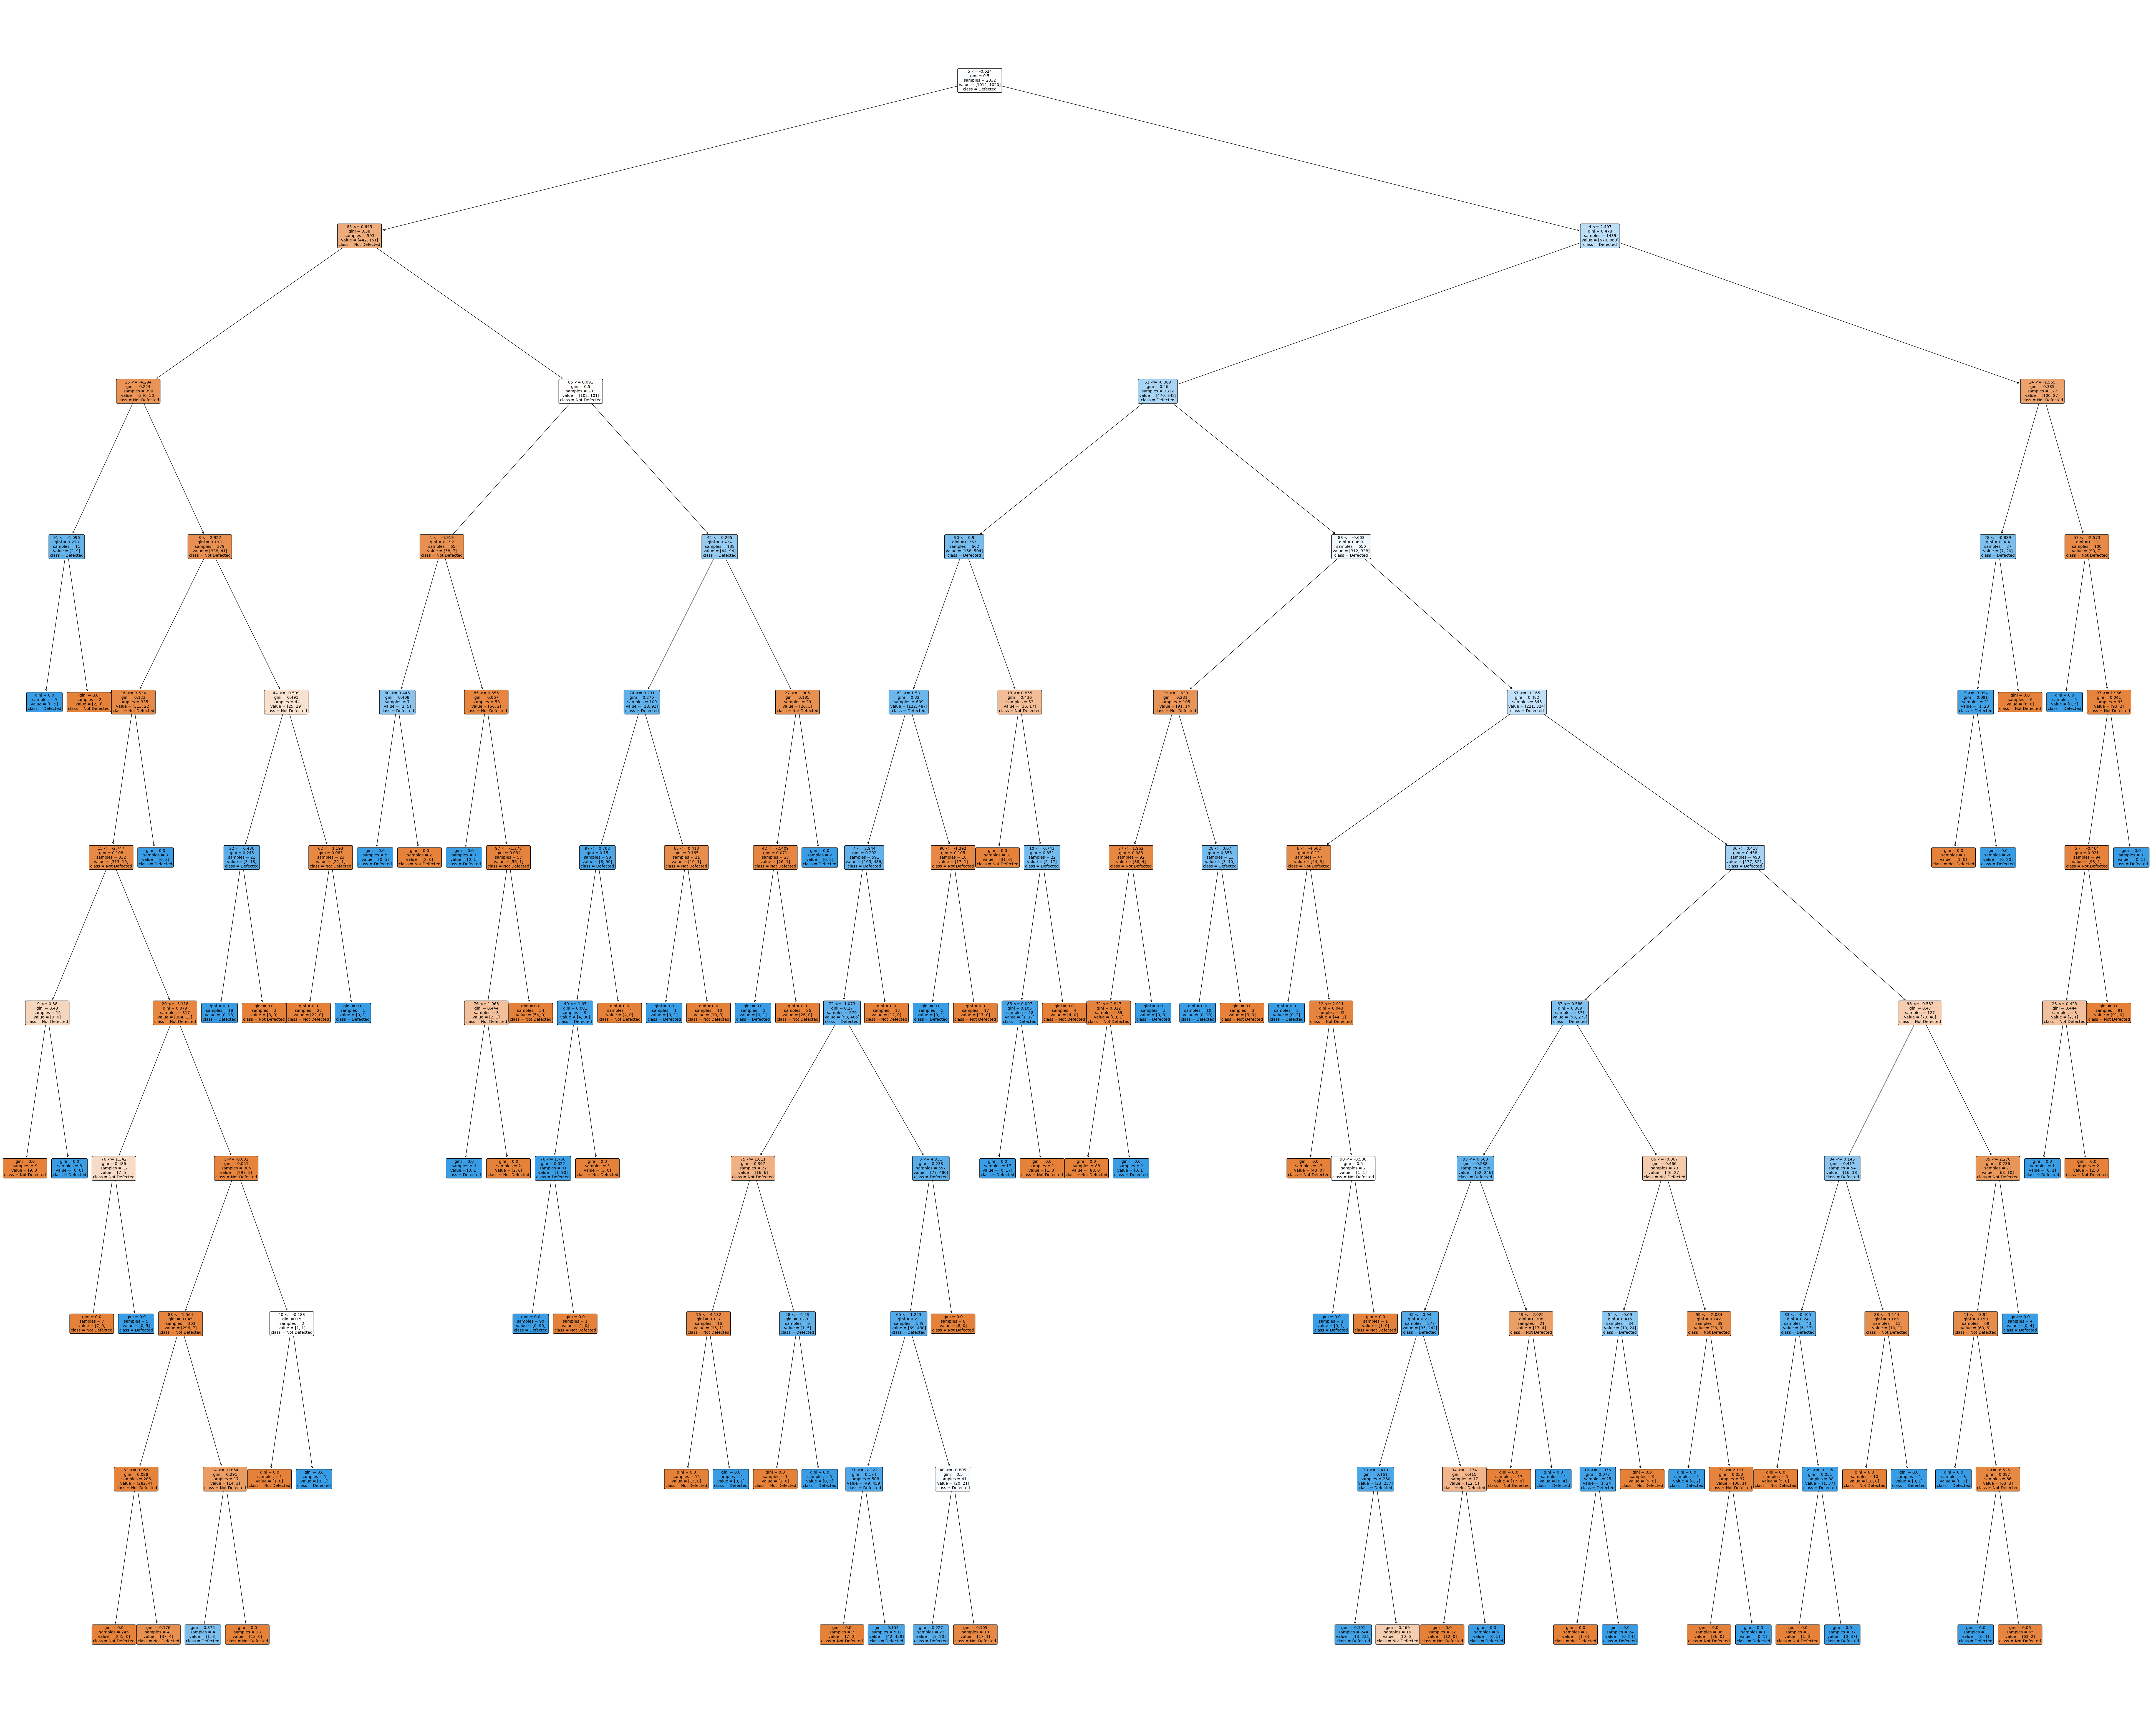

In [ ]:
# Import necessary libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(100,80))  # Adjust the figure size as needed
plot_tree(dtree, feature_names=df.columns[:-1], class_names=["Not Defected", "Defected"], filled=True, rounded=True)
plt.show()

In [ ]:
print("Confusion matrix :")
print(confusion_matrix(y_test,pred))

print("Classification Report:")
report_d1=classification_report(y_test,pred)
print(report_d1)
lines = report_d1.split('\n')

Confusion matrix :
[[348  92]
 [ 93 339]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       440
           1       0.79      0.78      0.79       432

    accuracy                           0.79       872
   macro avg       0.79      0.79      0.79       872
weighted avg       0.79      0.79      0.79       872



In [ ]:
f1_score_line = lines[2]
f1_score_d1= float(f1_score_line.split()[3])
print("F1 Score:", f1_score_d1)

f1_score_line = lines[2]
precision_d1= float(f1_score_line.split()[1])
print("Precision:", precision_d1)

f1_score_line = lines[2]
recall_d1= float(f1_score_line.split()[2])
print("Recall:", recall_d1)

auc_roc = roc_auc_score(y_test, pred)
print("AUC-ROC:", auc_roc)

F1 Score: 0.79
Precision: 0.79
Recall: 0.79
AUC-ROC: 0.7878156565656566


# Gradient Boosting Ensembling for Decision Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Stochastic Gradient Boosting classifier
sgb = GradientBoostingClassifier(n_estimators=200)

# Train the classifier
sgb.fit(X_train, y_train)

# Make predictions
pred = sgb.predict(X_test)

In [ ]:
train_accuracy_d = sgb.score(X_train, y_train)
test_accuracy_d = sgb.score(X_test, y_test)
print("Train Accuracy: ",train_accuracy_d)
print("Test Accuracy: ",test_accuracy_d)

accuracy_d = accuracy_score(y_test, pred)
print("Accuracy: ",accuracy_d)

Train Accuracy:  1.0
Test Accuracy:  0.963302752293578
Accuracy:  0.963302752293578


In [ ]:
print("Confusion matrix :")
print(confusion_matrix(y_test,pred))

print("Classification Report:")
report_d=classification_report(y_test,pred)
print(report_d)
lines = report_d.split('\n')

Confusion matrix :
[[415  25]
 [  7 425]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       440
           1       0.94      0.98      0.96       432

    accuracy                           0.96       872
   macro avg       0.96      0.96      0.96       872
weighted avg       0.96      0.96      0.96       872



In [ ]:
f1_score_line = lines[2]
f1_score_d= float(f1_score_line.split()[3])
print("F1 Score:", f1_score_d)

f1_score_line = lines[2]
precision_d= float(f1_score_line.split()[1])
print("Precision:", precision_d)

f1_score_line = lines[2] 
recall_d= float(f1_score_line.split()[2])
print("Recall:", recall_d)

auc_roc = roc_auc_score(y_test, pred)
print("AUC-ROC:", auc_roc)

F1 Score: 0.96
Precision: 0.98
Recall: 0.94
AUC-ROC: 0.9634890572390573


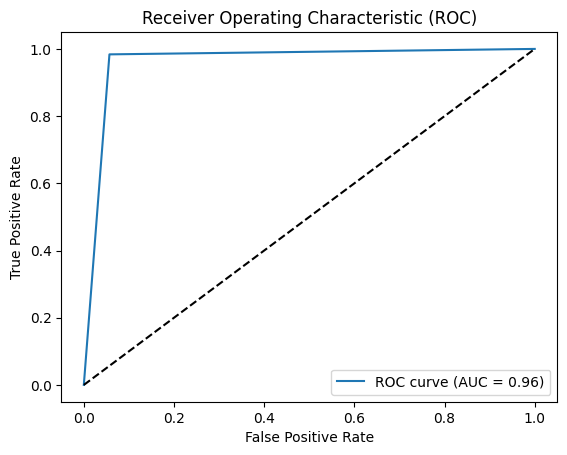

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
pred = rf_classifier.predict(X_test)

In [ ]:
train_accuracy_r = rf_classifier.score(X_train, y_train)
test_accuracy_r = rf_classifier.score(X_test, y_test)
print("Train Accuracy: ",train_accuracy_r)
print("Test Accuracy: ",test_accuracy_r)

accuracy_r = accuracy_score(y_test, pred)
print("Accuracy: ",accuracy_r)

Train Accuracy:  1.0
Test Accuracy:  0.9908256880733946
Accuracy:  0.9908256880733946


In [ ]:
print("Confusion matrix :")
print(confusion_matrix(y_test,pred))

print("Classification Report:")
report_r=classification_report(y_test,pred)
print(report_r)
lines = report_r.split('\n')

Confusion matrix :
[[438   2]
 [  6 426]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       440
           1       1.00      0.99      0.99       432

    accuracy                           0.99       872
   macro avg       0.99      0.99      0.99       872
weighted avg       0.99      0.99      0.99       872



In [ ]:
f1_score_line = lines[2] 
f1_score_r= float(f1_score_line.split()[3])
print("F1 Score:", f1_score_r)

f1_score_line = lines[2]  
precision_r= float(f1_score_line.split()[1])
print("Precision:", precision_r)

f1_score_line = lines[2]  
recall_r= float(f1_score_line.split()[2])
print("Recall:", recall_r)

auc_roc = roc_auc_score(y_test, pred)
print("AUC-ROC:", auc_roc)

F1 Score: 0.99
Precision: 0.99
Recall: 1.0
AUC-ROC: 0.9907828282828284


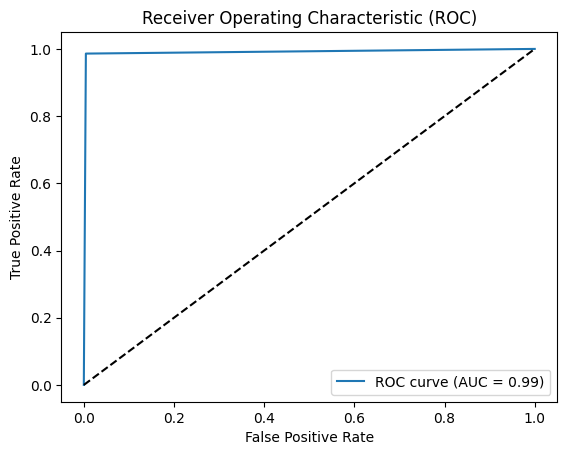

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()




















# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
pred = svm_classifier.predict(X_test)

In [ ]:
train_accuracy_s = svm_classifier.score(X_train, y_train)
test_accuracy_s = svm_classifier.score(X_test, y_test)
print("Train Accuracy: ",train_accuracy_s)
print("Test Accuracy: ",test_accuracy_s)

accuracy_s = accuracy_score(y_test, pred)
print("Accuracy: ",accuracy_s)

Train Accuracy:  1.0
Test Accuracy:  0.9942660550458715
Accuracy:  0.9942660550458715


In [ ]:
print("Confusion matrix :")
print(confusion_matrix(y_test,pred))

print("Classification Report:")
report_s=classification_report(y_test,pred)
print(report_s)
lines = report_s.split('\n')

Confusion matrix :
[[438   2]
 [  3 429]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       440
           1       1.00      0.99      0.99       432

    accuracy                           0.99       872
   macro avg       0.99      0.99      0.99       872
weighted avg       0.99      0.99      0.99       872



In [ ]:
f1_score_line = lines[2] 
f1_score_s= float(f1_score_line.split()[3])
print("F1 Score:", f1_score_s)

f1_score_line = lines[2]  
precision_s= float(f1_score_line.split()[1])
print("Precision:", precision_s)

f1_score_line = lines[2]  
recall_s= float(f1_score_line.split()[2])
print("Recall:", recall_s)

auc_roc = roc_auc_score(y_test, pred)
print("AUC-ROC:", auc_roc)

F1 Score: 0.99
Precision: 0.99
Recall: 1.0
AUC-ROC: 0.9942550505050506


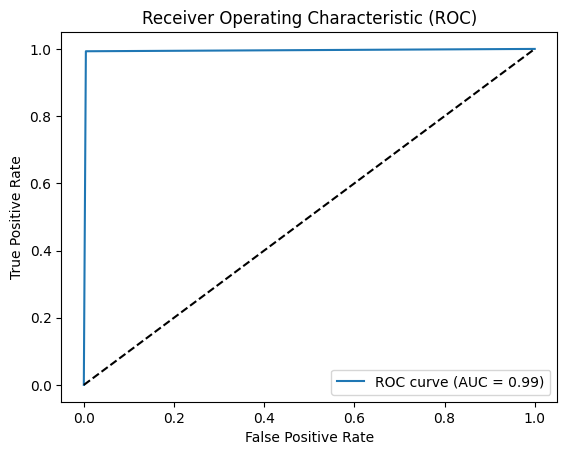

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()






# Fully Connected Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.initializers import HeUniform
import tensorflow.keras.backend as K
import tensorflow as tf

def custom_mlp_model():
    model = Sequential()

    initializer = HeUniform() 
    model.add(Dense(512, input_shape=(100,), kernel_initializer=initializer))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(128, kernel_initializer=initializer))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
 

    model.add(Dense(128, kernel_initializer=initializer))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
 
    model.add(Dense(128, kernel_initializer=initializer))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
 
    

    

    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = custom_mlp_model()
model.summary()
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))
test_loss_nn, test_accuracy_nn = model.evaluate(X_test, y_test)
train_accuracy_nn = max(history.history['accuracy'])

print("Train Accuracy of neural network: ", train_accuracy_nn)
print("Test Accuracy of neural network: ", test_accuracy_nn)


predictions = model.predict(X_test)
rounded_predictions = tf.where(predictions >= 0.5, 1.0, 0.0)
y_pred=rounded_predictions





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                     

In [ ]:
from sklearn.metrics import accuracy_score

rounded_predictions = np.round(predictions, 2)
print(np.unique(rounded_predictions))

print(np.unique(y_pred))
print(np.unique(y_test))
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Print the final accuracies
final_train_accuracy = train_accuracy[-1]
final_test_accuracy = test_accuracy[-1]

print(f"Final Train Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Test Accuracy: {final_test_accuracy*100:.2f}%")
accuracy_nn = accuracy_score(y_test, y_pred)

print("Accuracy", accuracy_nn)


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.08 0.09 0.1  0.11 0.13 0.14 0.17
 0.18 0.19 0.21 0.22 0.28 0.3  0.34 0.35 0.36 0.38 0.41 0.42 0.51 0.53
 0.56 0.58 0.71 0.84 0.92 0.97 0.98 0.99 1.  ]
[0. 1.]
[0 1]
Final Train Accuracy: 99.16%
Final Test Accuracy: 98.62%
Accuracy 0.9862385321100917


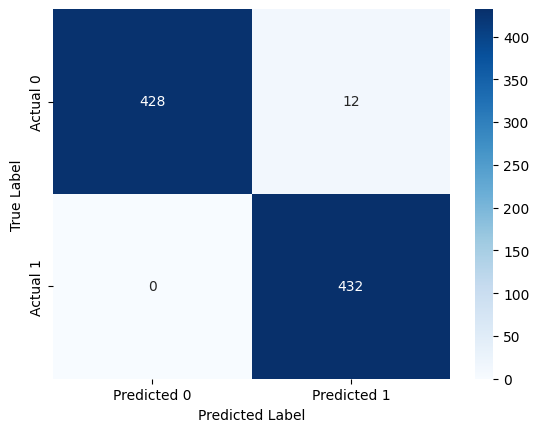

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       440
           1       0.97      1.00      0.99       432

    accuracy                           0.99       872
   macro avg       0.99      0.99      0.99       872
weighted avg       0.99      0.99      0.99       872



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:")
report_nn = classification_report(y_test,y_pred)
print(report_nn)


In [ ]:
lines = report_nn.split('\n')
f1_score_line = lines[2] 
f1_score_nn= float(f1_score_line.split()[3])
print("F1 Score:", f1_score_nn)

f1_score_line = lines[2]  
precision_nn= float(f1_score_line.split()[1])
print("Precision:", precision_nn)

f1_score_line = lines[2]  
recall_nn= float(f1_score_line.split()[2])
print("Recall:", recall_nn)

auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

F1 Score: 0.99
Precision: 1.0
Recall: 0.97
AUC-ROC: 0.9863636363636364


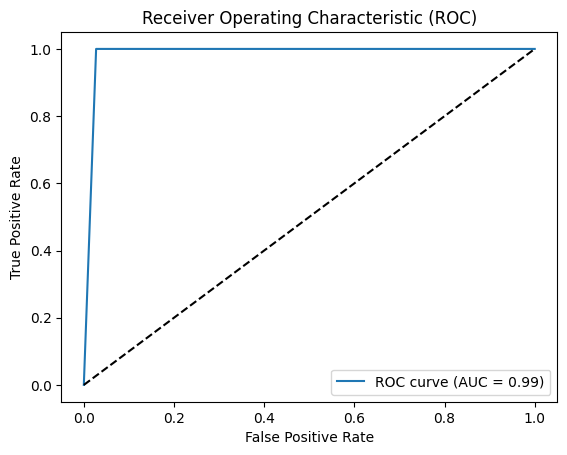

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

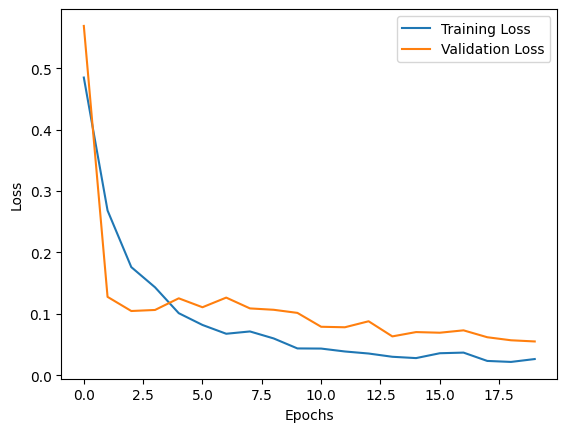

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

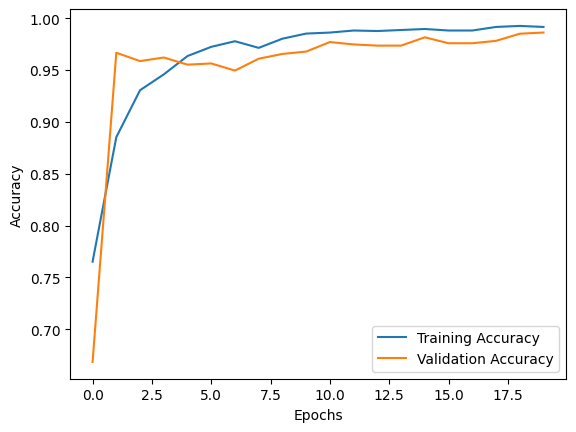

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()






# Results

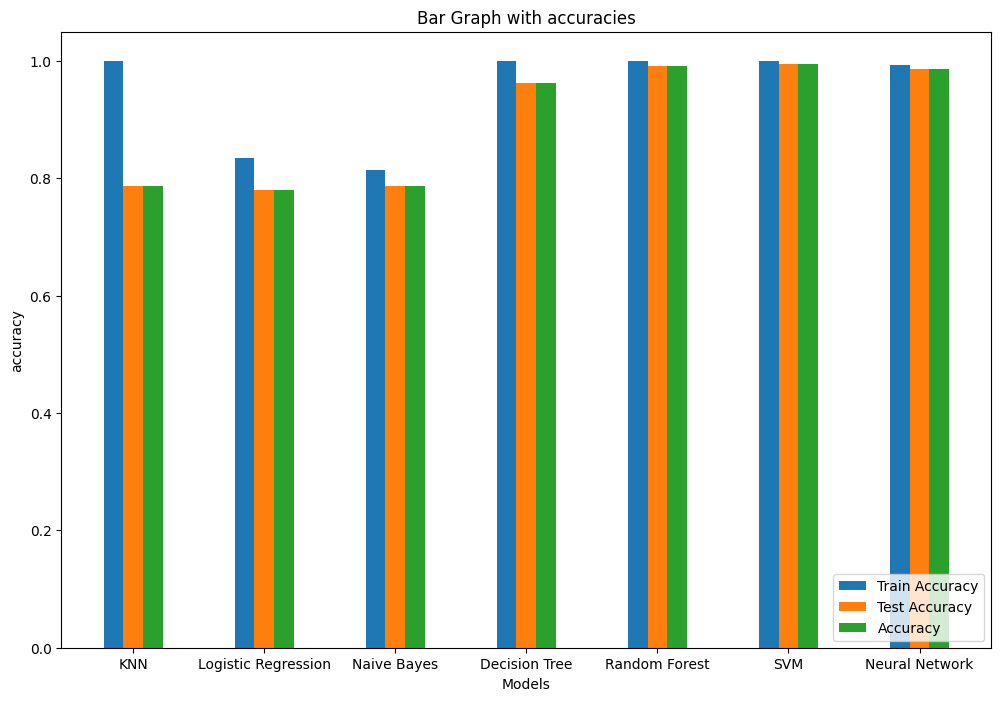

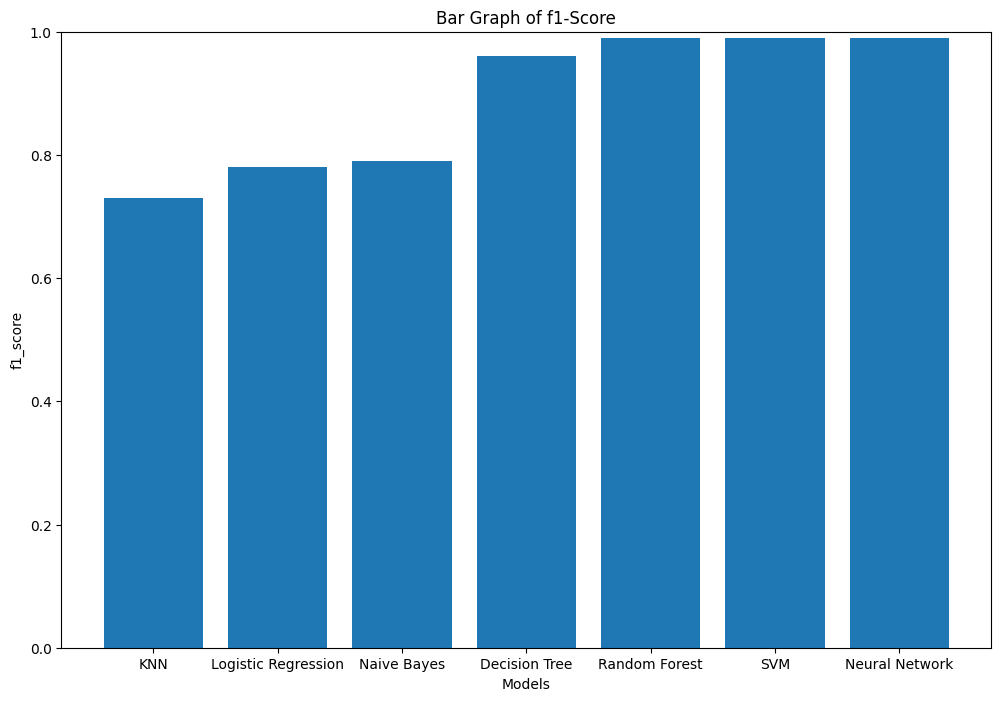

In [ ]:
classes = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest','SVM','Neural Network']

values = [train_accuracy_k , train_accuracy_l, train_accuracy_n, train_accuracy_d, train_accuracy_r,train_accuracy_s,train_accuracy_nn]

# Data for the columns
labels = ['KNN', 'Logistic Regression', 'Naive Bayes','Decision Tree', 'Random Forest', 'SVM','Neural Network']
values1 = [train_accuracy_k , train_accuracy_l, train_accuracy_n, train_accuracy_d, train_accuracy_r, train_accuracy_s,train_accuracy_nn]
values2 = [test_accuracy_k , test_accuracy_l, test_accuracy_n, test_accuracy_d, test_accuracy_r, test_accuracy_s,test_accuracy_nn]
values3 = [accuracy_k , accuracy_l, accuracy_n, accuracy_d, accuracy_r, accuracy_s,accuracy_nn]

# Positions of the bars on the x-axis
x = np.arange(len(labels))

# Width of each bar
width = 0.15

# Plotting the bar graph
#print(values1)
plt.figure(figsize=(12, 8))
plt.bar(x - width, values1, width, label='Train Accuracy')
plt.bar(x, values2, width, label='Test Accuracy')
plt.bar(x + width, values3, width, label='Accuracy')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Bar Graph with accuracies')

# Setting the x-axis tick labels
plt.xticks(x, labels)

# Adding a legend
plt.legend(loc='lower right')

# Displaying the graph
plt.show()
classes = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM','Neural Network']
values = [f1_score_k,f1_score_l ,f1_score_n ,f1_score_d, f1_score_r, f1_score_s,f1_score_nn]
plt.figure(figsize=(12, 8))
# Plotting the bar graph
plt.bar(classes, values)

# Setting the y-axis limits to range from 0 to 1
plt.ylim(0, 1)

# Adding labels and title

plt.xlabel('Models')
plt.ylabel('f1_score')
plt.title('Bar Graph of f1-Score')
plt.show()


In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
# Define the columns
table.field_names = ["Models", "Precision" , "Recall" , "F1-Score" , "Train Accuracy", "Test Accuracy", "Accuracy"]
# Add rows to the table
table.add_row(["KNN", precision_k , recall_k , f1_score_k , train_accuracy_k , test_accuracy_k , accuracy_k ])
table.add_row(["Logistic Regression", precision_l1 , recall_l1 , f1_score_l1 , train_accuracy_l1 , test_accuracy_l1 , accuracy_l1 ])
table.add_row(["LR with boosting", precision_l , recall_l , f1_score_l , train_accuracy_l , test_accuracy_l , accuracy_l ])
table.add_row(["Naive Bayes", precision_n1 , recall_n1 , f1_score_n1 , train_accuracy_n1 , test_accuracy_n1 , accuracy_n1 ])
table.add_row(["NB with boosting", precision_n , recall_n , f1_score_n , train_accuracy_n , test_accuracy_n , accuracy_n ])
table.add_row(["Decision Tree", precision_d1 , recall_d1 , f1_score_d1 , train_accuracy_d1 , test_accuracy_d1 , accuracy_d1 ])
table.add_row(["DT with boosting", precision_d , recall_d , f1_score_d , train_accuracy_d , test_accuracy_d , accuracy_d ])
table.add_row(["Random Forest", precision_r , recall_r , f1_score_r , train_accuracy_r , test_accuracy_r , accuracy_r ])
table.add_row(["SVM", precision_s , recall_s , f1_score_s , train_accuracy_s , test_accuracy_s , accuracy_s ])
table.add_row(["Neural Network", precision_nn , recall_nn , f1_score_nn , train_accuracy_nn , test_accuracy_nn , accuracy_nn ])
print(table)


+---------------------+-----------+--------+----------+--------------------+--------------------+--------------------+
|        Models       | Precision | Recall | F1-Score |   Train Accuracy   |   Test Accuracy    |      Accuracy      |
+---------------------+-----------+--------+----------+--------------------+--------------------+--------------------+
|         KNN         |    1.0    |  0.58  |   0.73   |        1.0         | 0.7878440366972477 | 0.7878440366972477 |
| Logistic Regression |    0.88   |  0.75  |   0.81   | 0.8730314960629921 | 0.823394495412844  | 0.823394495412844  |
|   LR with boosting  |    0.79   |  0.77  |   0.78   | 0.8351377952755905 | 0.7798165137614679 | 0.7798165137614679 |
|     Naive Bayes     |    0.75   |  0.78  |   0.77   | 0.7859251968503937 | 0.7591743119266054 | 0.7591743119266054 |
|   NB with boosting  |    0.79   |  0.79  |   0.79   | 0.8139763779527559 | 0.7878440366972477 | 0.7878440366972477 |
|    Decision Tree    |    0.79   |  0.79  |   0

In [ ]:
print("#################################################Classification Report###########################################")
# Create a PrettyTable instance
table1 = PrettyTable()

# Define columns and set column widths
table1.field_names = ["kNN", "Logistic Regression"]
table1._max_width = {"Column 1": 90, "Column 2": 90}  # Adjust width as needed
table1.add_row([report_k, report_l1])
print(table1)
table2 = PrettyTable()
table2.field_names = ['Logistic Regression with boosting','Naive Bayes']
table2._max_width = {"Column 1": 90, "Column 2": 90}  # Adjust width as needed
table2.add_row([report_l, report_n1])
print(table2)
table3 = PrettyTable()
table3.field_names = ['Naive Bayes with boosting','Decision Tree']
table3._max_width = {"Column 1": 90, "Column 2": 90}  # Adjust width as needed
table3.add_row([report_n, report_d1])
print(table3)
table4 = PrettyTable()
table4.field_names = ['Decision Tree with boosting', 'Random Forest']
table4._max_width = {"Column 1": 90, "Column 2": 90}  # Adjust width as needed
table4.add_row([report_d, report_r])
print(table4)
table5 = PrettyTable()
table5.field_names = ['SVM', 'Neural Network']
table5._max_width = {"Column 1": 90, "Column 2": 90}  # Adjust width as needed
table5.add_row([report_s,report_nn])
print(table5)



#################################################Classification Report###########################################
+-------------------------------------------------------+-------------------------------------------------------+
|                          kNN                          |                  Logistic Regression                  |
+-------------------------------------------------------+-------------------------------------------------------+
|               precision    recall  f1-score   support |               precision    recall  f1-score   support |
|                                                       |                                                       |
|            0       1.00      0.58      0.73       440 |            0       0.88      0.75      0.81       440 |
|            1       0.70      1.00      0.82       432 |            1       0.78      0.90      0.83       432 |
|                                                       |                               

# Inferencing

In [ ]:
#data for inferencing
X_i=removed_data.drop('Pass/Fail', axis=1)
y_i=removed_data['Pass/Fail']
y_i = y_i.values

# Predictions from trained models
inference_k = knn.predict(X_i)
inference_l = boosted_classifier.predict(X_i)
inference_n = boosted_naive_bayes.predict(X_i)
inference_d = sgb.predict(X_i)
inference_r = rf_classifier.predict(X_i)
inference_s = svm_classifier.predict(X_i)
inference_nn = model.predict(X_i)


threshold = 0.5
inference_nn_binary = [1 if prediction > threshold else 0 for prediction in inference_nn]

# Convert the list to a NumPy array and print without commas and spaces
inference_nn_binary = np.array(inference_nn_binary)

#comparing True value and predicted value
true_predictions_nn = (inference_nn_binary == y_i)
true_predictions_k = (inference_k == y_i)
true_predictions_l = (inference_l == y_i)
true_predictions_n = (inference_n == y_i)
true_predictions_d = (inference_d == y_i)
true_predictions_r = (inference_r == y_i)
true_predictions_s = (inference_s == y_i)

# Calculate and display the number of true and false predictions
num_total_predictions=23

num_true_predictions_k = sum(true_predictions_k)
num_false_predictions_k = len(inference_k) - num_true_predictions_k
per_k = (num_true_predictions_k / num_total_predictions) * 100

num_true_predictions_l = sum(true_predictions_l)
num_false_predictions_l = len(inference_l) - num_true_predictions_l
per_l = (num_true_predictions_l / num_total_predictions) * 100

num_true_predictions_n = sum(true_predictions_n)
num_false_predictions_n = len(inference_n) - num_true_predictions_n
per_n = (num_true_predictions_n / num_total_predictions) * 100

num_true_predictions_d = sum(true_predictions_d)
num_false_predictions_d = len(inference_d) - num_true_predictions_d
per_d = (num_true_predictions_d / num_total_predictions) * 100

num_true_predictions_r = sum(true_predictions_r)
num_false_predictions_r = len(inference_r) - num_true_predictions_r
per_r=(num_true_predictions_r / num_total_predictions) * 100

num_true_predictions_s = sum(true_predictions_s)
num_false_predictions_s = len(inference_s) - num_true_predictions_s
per_s=(num_true_predictions_s / num_total_predictions) * 100

num_true_predictions_nn = sum(true_predictions_nn)
num_false_predictions_nn = len(inference_nn) - num_true_predictions_nn
per_nn = (num_true_predictions_nn / num_total_predictions) * 100

# Display output
print("                    Inferencing for 23 Data points")
print("-------------------------------------------------------------------------")
data = {'Num of True pred': [num_true_predictions_k, num_true_predictions_l, num_true_predictions_n, num_true_predictions_d, num_true_predictions_r, num_true_predictions_s, num_true_predictions_nn],
        'Num of False pred':[num_false_predictions_k, num_false_predictions_l, num_false_predictions_n, num_false_predictions_d, num_false_predictions_r,  num_false_predictions_s, num_false_predictions_nn],
        '% Correct': [per_k, per_l, per_n, per_d, per_r, per_s,per_nn]}
row_indices = ['KNN', 'Logistic Regression', 'Naive Bayes','Decision Tree', 'Random Forest' , 'SVM' , 'Neural Network']
df_final= pd.DataFrame(data, index=row_indices)

print(df_final)


1/1 [==============================] - 1s 514ms/step
                    Inferencing for 23 Data points
-------------------------------------------------------------------------
                     Num of True pred  Num of False pred  % Correct
KNN                                14                  9  60.869565
Logistic Regression                15                  8  65.217391
Naive Bayes                        15                  8  65.217391
Decision Tree                      14                  9  60.869565
Random Forest                      12                 11  52.173913
SVM                                13                 10  56.521739
Neural Network                     14                  9  60.869565


In [ ]:
print("                                             KNN")
print("Predicted: ",inference_k)
print("Actual   : ",y_i)
print("                                     Logistic Regression")
print("Predicted: ",inference_l)
print("Actual   : ",y_i)
print("                                         Naive Bayes")
print("Predicted: ",inference_n)
print("Actual   : ",y_i)
print("                                        Decision Tree")
print("Predicted: ",inference_d)
print("Actual   : ",y_i)
print("                                        Random Forest")
print("Predicted: ",inference_r)
print("Actual   : ",y_i)
print("                                             SVM")
print("Predicted: ",inference_s)
print("Actual   : ",y_i)
print("                                     Neural Network")
print("Predicted: ",inference_nn_binary)
print("Actual   : ",y_i)

                                             KNN
Predicted:  [0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1]
Actual   :  [1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0]
                                     Logistic Regression
Predicted:  [1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual   :  [1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0]
                                         Naive Bayes
Predicted:  [1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
Actual   :  [1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0]
                                        Decision Tree
Predicted:  [0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
Actual   :  [1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0]
                                        Random Forest
Predicted:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual   :  [1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0]
                                             SVM
Predicted:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual   :  [1 0 1 1 1 1

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve for a model
def plot_roc_curve(model_name, y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_value:.2f})')

# Plot ROC curves for all models
plot_roc_curve("KNN", y_test, knn.predict_proba(X_test)[:, 1])
plot_roc_curve("Logistic Regression", y_test, classifier.predict_proba(X_test)[:, 1])
plot_roc_curve("Boosted Logistic Regression", y_test, boosted_classifier.predict_proba(X_test)[:, 1])
plot_roc_curve("Naive Bayes", y_test, naive_bayes_classifier.predict_proba(X_test)[:, 1])
plot_roc_curve("Boosted Naive Bayes", y_test, boosted_naive_bayes.predict_proba(X_test)[:, 1])
plot_roc_curve("Decision Tree", y_test, dtree.predict_proba(X_test)[:, 1])
plot_roc_curve("Boosted Decision Tree", y_test, boosted_classifier.predict_proba(X_test)[:, 1])
plot_roc_curve("Random Forest", y_test, rf_classifier.predict_proba(X_test)[:, 1])
plot_roc_curve("SVM", y_test, svm_classifier.decision_function(X_test))
plot_roc_curve("Neural Network", y_test, model.predict(X_test).ravel())

# Customize the plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


NameError: name 'y_test' is not defined